# Pandas Project 5 - Crop Yield

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('crop_yield.csv')
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [7]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [8]:
# checking null values
df.isnull().any()

Crop               False
Crop_Year          False
Season             False
State              False
Area               False
Production         False
Annual_Rainfall    False
Fertilizer         False
Pesticide          False
Yield              False
dtype: bool

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19684    False
19685    False
19686    False
19687    False
19688    False
Length: 19689, dtype: bool

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0, 0.5, 'Yield')

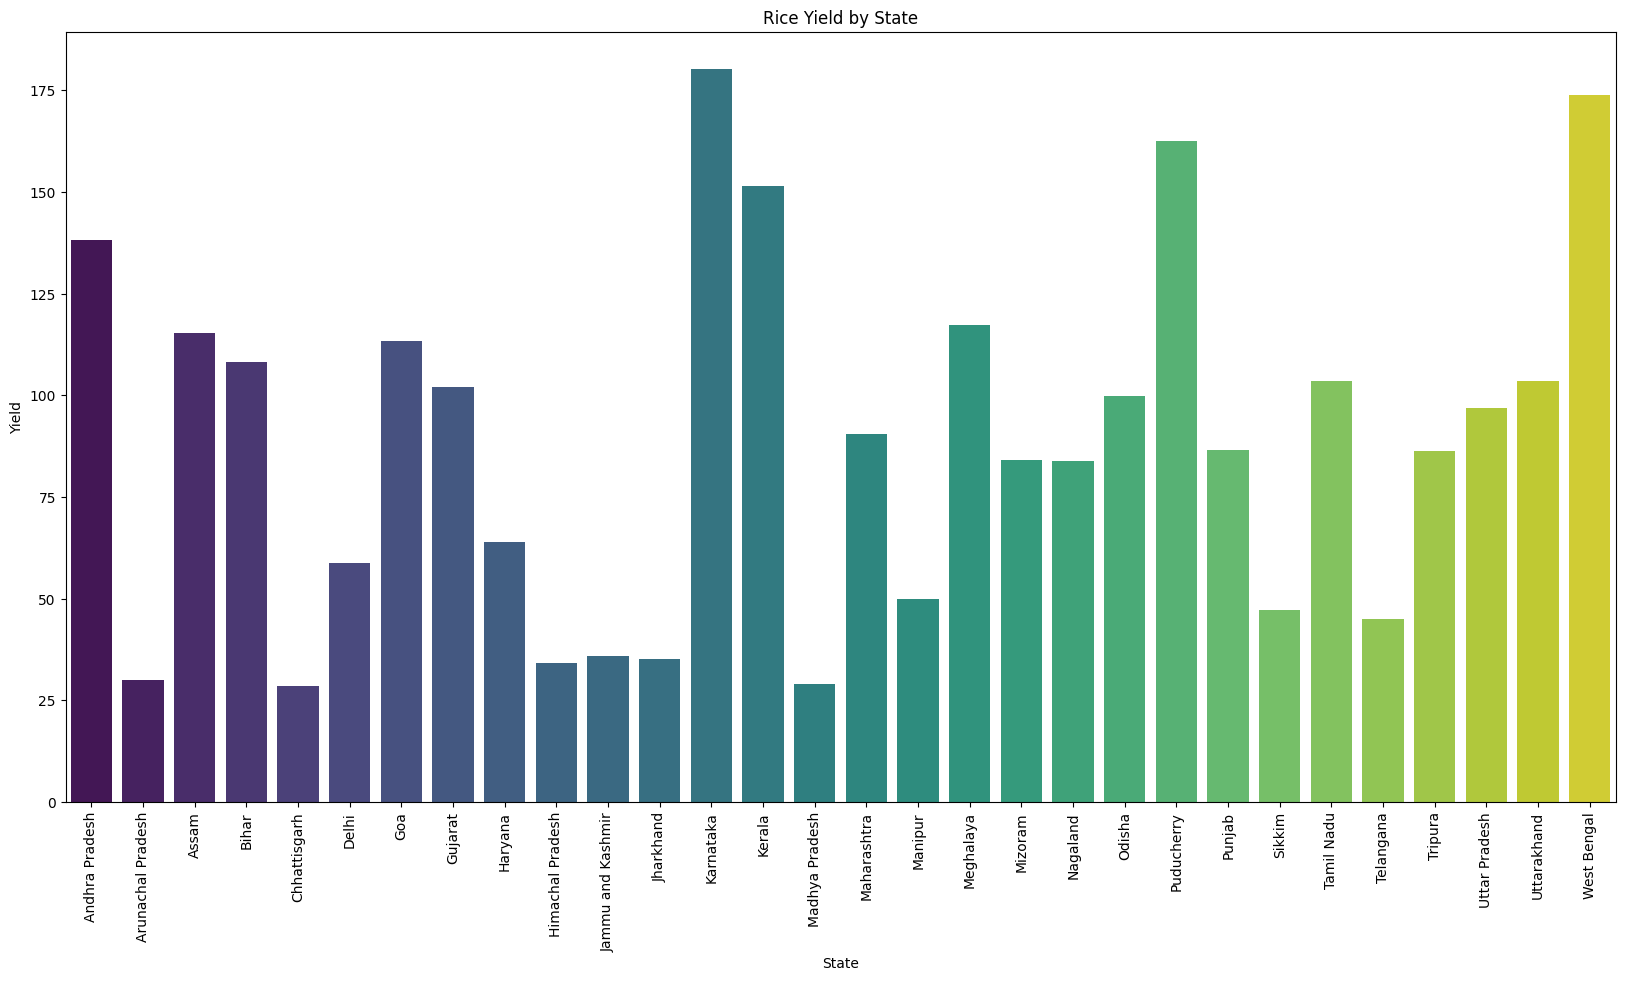

In [45]:
# 1. In which state is cultivating crop rice is cultivated and how much total yield is each state?
a=df.query("Crop=='Rice'")
c=a.groupby('State')['Yield'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=c, x='State', y='Yield',palette='viridis')
plt.xticks(rotation=90)
plt.title('Rice Yield by State')
plt.xlabel('State')
plt.ylabel('Yield')

Text(0, 0.5, 'Yield')

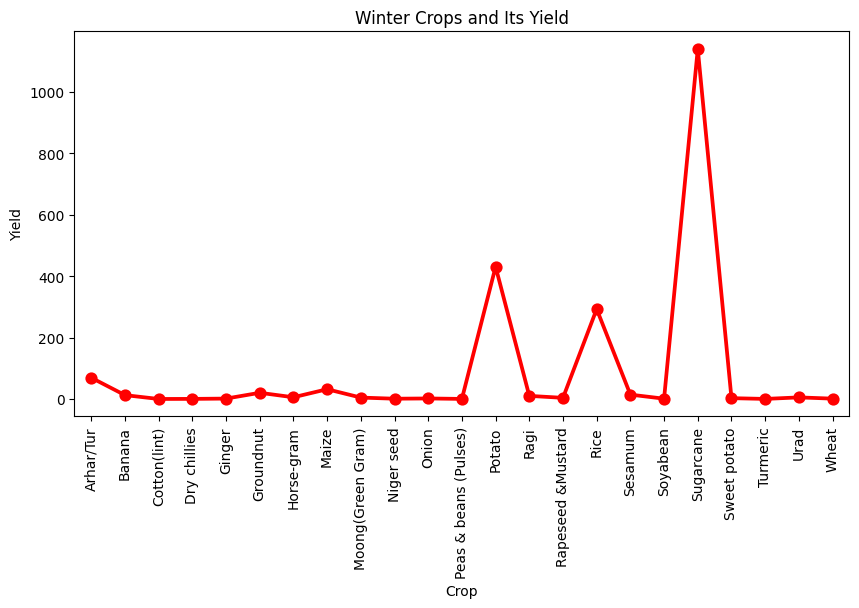

In [91]:
# 2. In Winter which crops are cultivating and how each crop yields?
s=df.query("Season=='Winter     '")
plt.figure(figsize=(10,5))
w=s.groupby('Crop')['Yield'].sum().reset_index()
sns.pointplot(data=w, x='Crop', y='Yield', color='r', marker="o",linestyle="-",)
plt.xticks(rotation=90)
plt.title('Winter Crops and Its Yield')
plt.xlabel('Crop')
plt.ylabel('Yield')

Text(0, 0.5, 'Production')

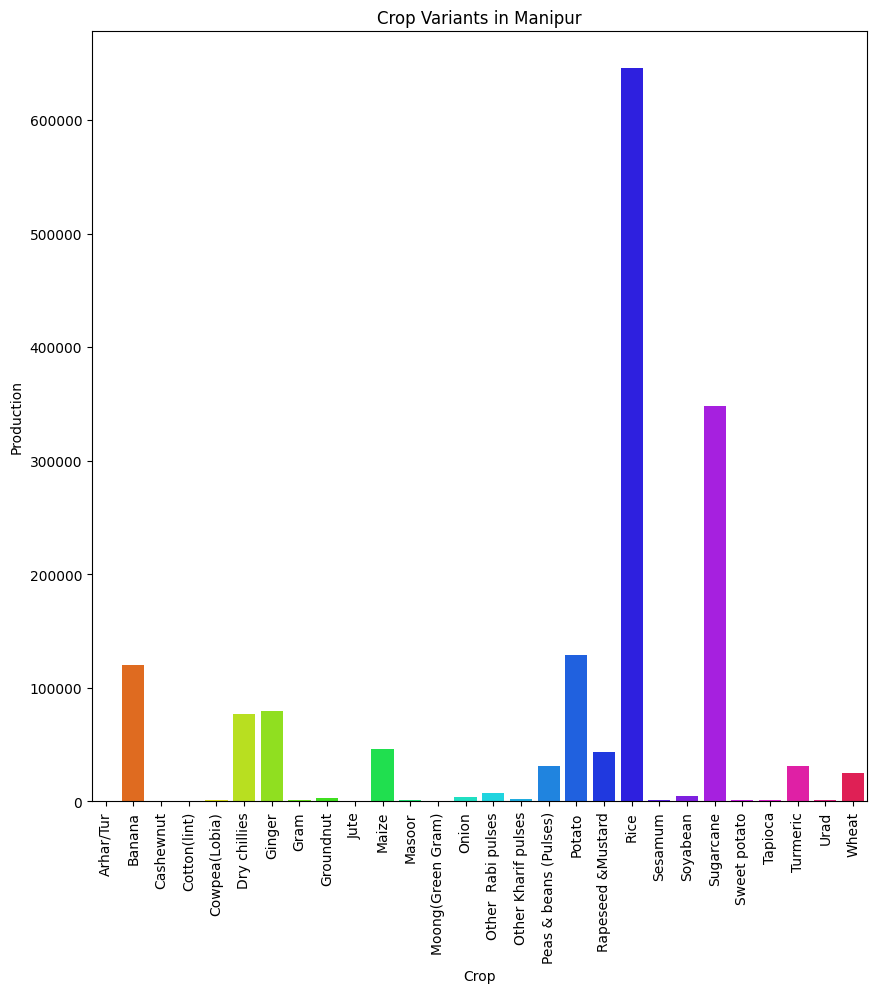

In [163]:
# 3. In Manipur how many variants of crops are cultivating and which crop gives maximum Production?
m=df.query("State=='Manipur'")
s=m.groupby('Crop')['Production'].max().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=s, x='Crop', y='Production', palette='hsv')
plt.xticks(rotation=90)
plt.title('Crop Variants in Manipur')
plt.xlabel('Crop')
plt.ylabel('Production')

Text(0, 0.5, 'Production')

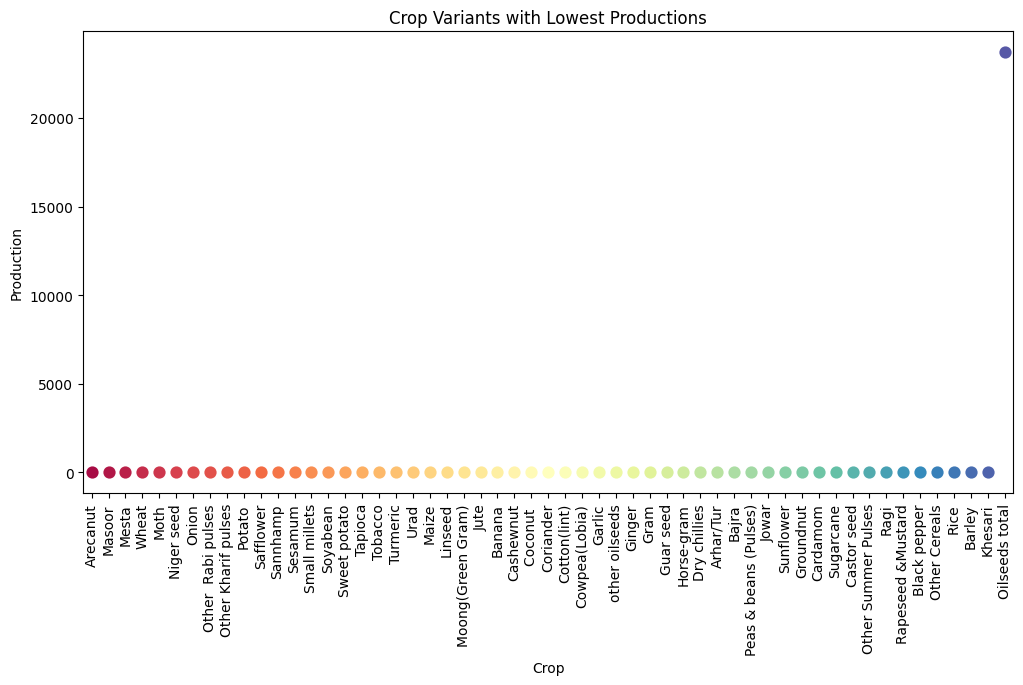

In [145]:
# 4. Which is the lowest Productions yielding crop?
s=df.groupby('Crop')['Production'].min().reset_index()
s1=s.sort_values(by='Production',ascending=True)
plt.figure(figsize=(12,6))
sns.pointplot(data=s1, x='Crop', y='Production', palette='Spectral',marker='o')
plt.xticks(rotation=90)
plt.title('Crop Variants with Lowest Productions')
plt.xlabel('Crop')
plt.ylabel('Production')

Text(0, 0.5, 'Area')

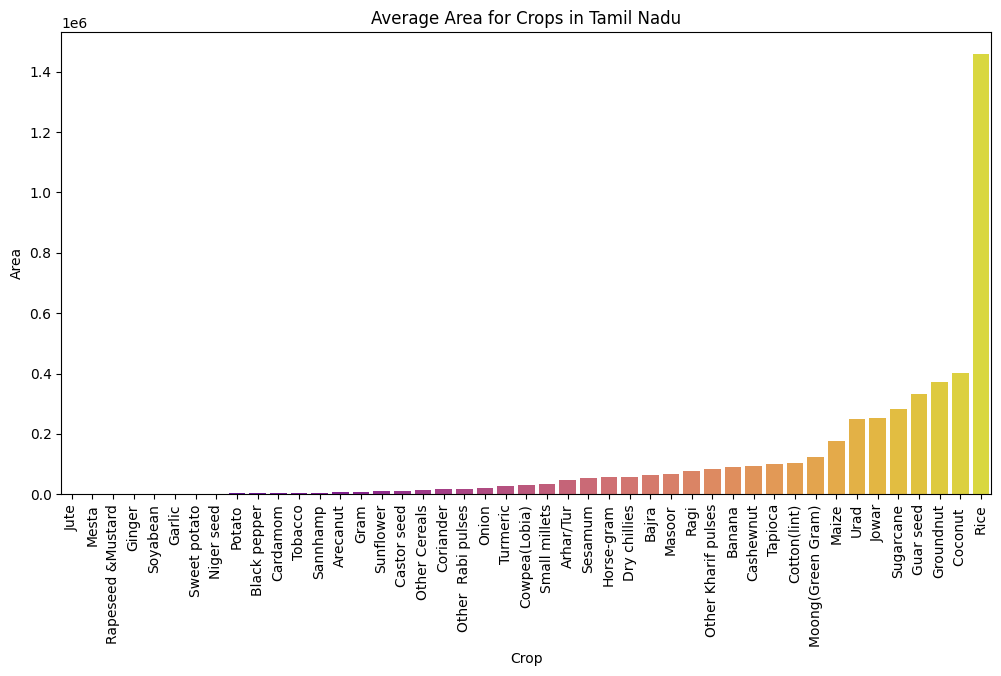

In [155]:
# 5. In Tamil Nadu What is average area for cultivating the crops ?
t=df.query("State=='Tamil Nadu'")
tn=t.groupby('Crop')['Area'].mean().reset_index()
tn1=tn.sort_values(by='Area',ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=tn1, x='Crop', y='Area', palette='plasma')
plt.xticks(rotation=90)
plt.title('Average Area for Crops in Tamil Nadu')
plt.xlabel('Crop')
plt.ylabel('Area')

Text(0, 0.5, 'Annual Rainfall')

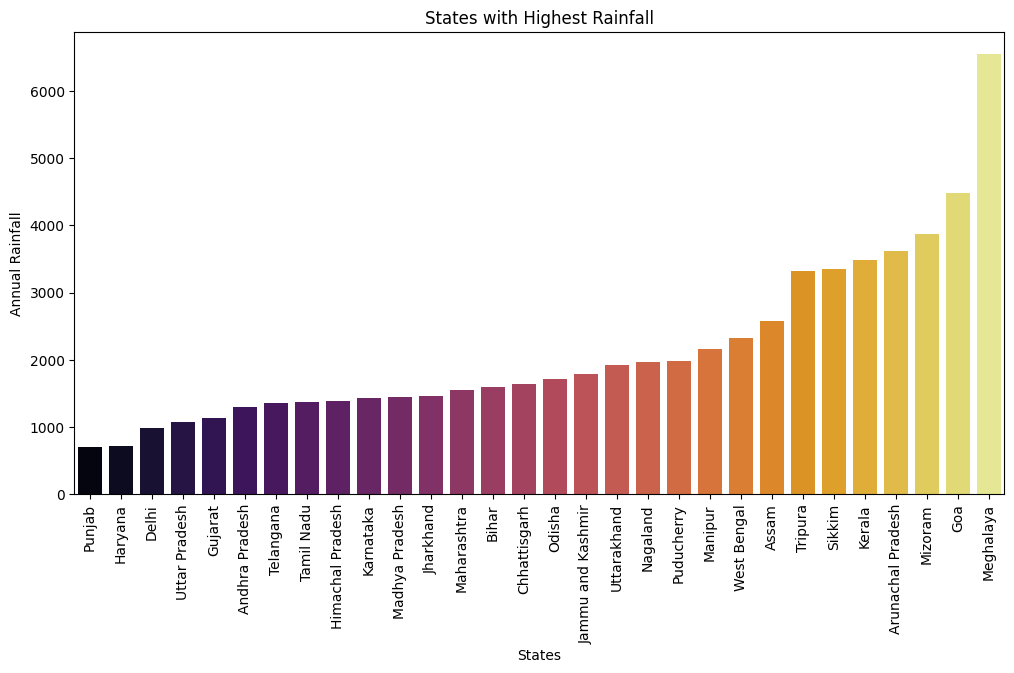

In [167]:
# 6. What is Highest annual rainfall getting state?
r=df.groupby('State')['Annual_Rainfall'].max().reset_index()
r1=r.sort_values(by='Annual_Rainfall',ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=r1, x='State', y='Annual_Rainfall', palette='inferno')
plt.xticks(rotation=90)
plt.title('States with Highest Rainfall')
plt.xlabel('States')
plt.ylabel('Annual Rainfall')

Text(0, 0.5, 'Maximum Fertilizer Used')

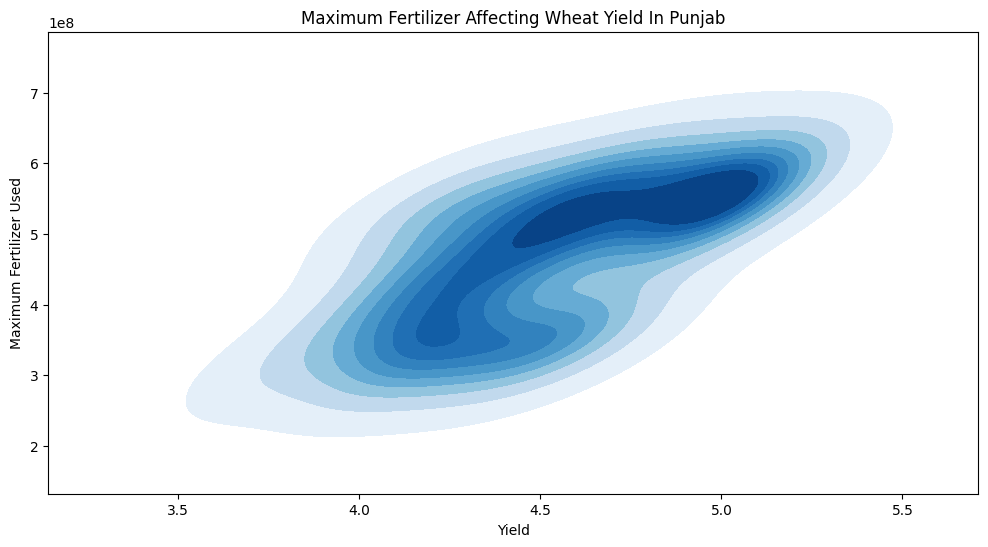

In [225]:
# 7. What highest fertillizer affect the crop Wheat and its yield in Punjab?
w=df.query("Crop=='Wheat' and State=='Punjab'")
wh=w.groupby('Yield')['Fertilizer'].max().reset_index()
wh1=wh.sort_values(by='Fertilizer',ascending=True)
plt.figure(figsize=(12,6))
sns.kdeplot(data=wh1,x='Yield', y='Fertilizer',cmap='Blues', shade=True)
plt.title('Maximum Fertilizer Affecting Wheat Yield In Punjab')
plt.xlabel('Yield')
plt.ylabel('Maximum Fertilizer Used')

Text(0, 0.5, 'Minimum Pesticide Used')

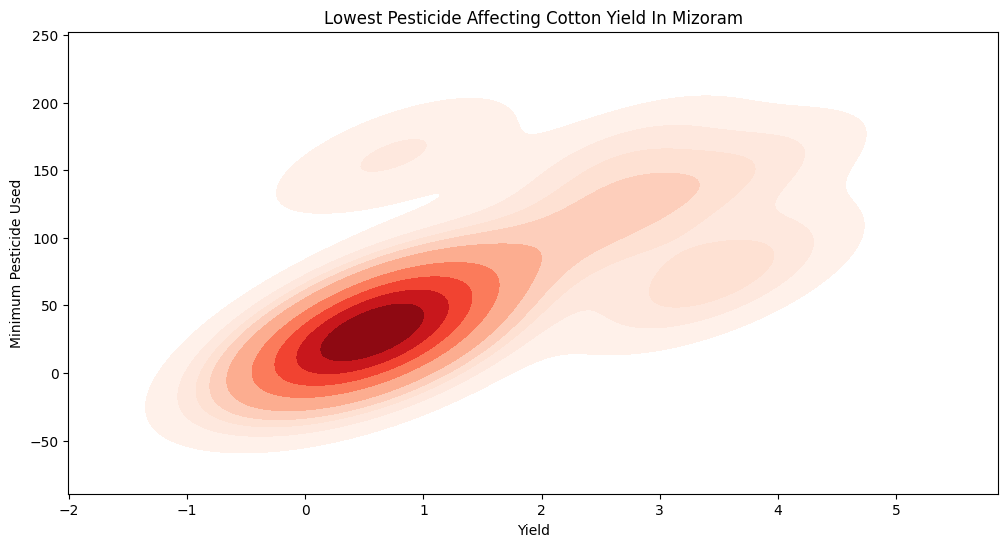

In [223]:
# 8. How lowest pesticide affect the crop Cotton and its yield in Mizoram?
c=df.query("Crop=='Cotton(lint)' and State=='Mizoram'")
cn=c.groupby('Yield')['Pesticide'].min().reset_index()
cn1=cn.sort_values(by='Pesticide',ascending=True)
plt.figure(figsize=(12,6))
sns.kdeplot(data=cn1,x='Yield', y='Pesticide',cmap='Reds', shade=True)
plt.title('Lowest Pesticide Affecting Cotton Yield In Mizoram')
plt.xlabel('Yield')
plt.ylabel('Minimum Pesticide Used')

Text(0, 0.5, 'Crop Year')

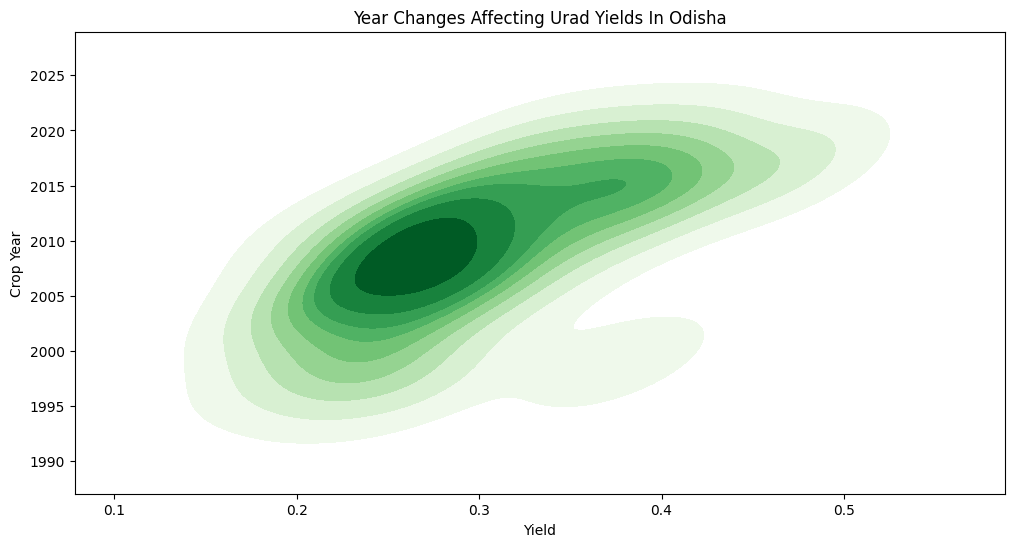

In [227]:
# 9. How crop Urad affect yield during year changes in Odisha ?
u=df.query("Crop=='Urad' and State=='Odisha'")
ud=u.groupby('Yield')['Crop_Year'].sum().reset_index()
ud1=ud.sort_values(by='Crop_Year',ascending=True)
plt.figure(figsize=(12,6))
sns.kdeplot(data=ud1,x='Yield', y='Crop_Year',cmap='Greens', shade=True)
plt.title('Year Changes Affecting Urad Yields In Odisha')
plt.xlabel('Yield')
plt.ylabel('Crop Year')

Text(0, 0.5, 'Average Annual Rainfall')

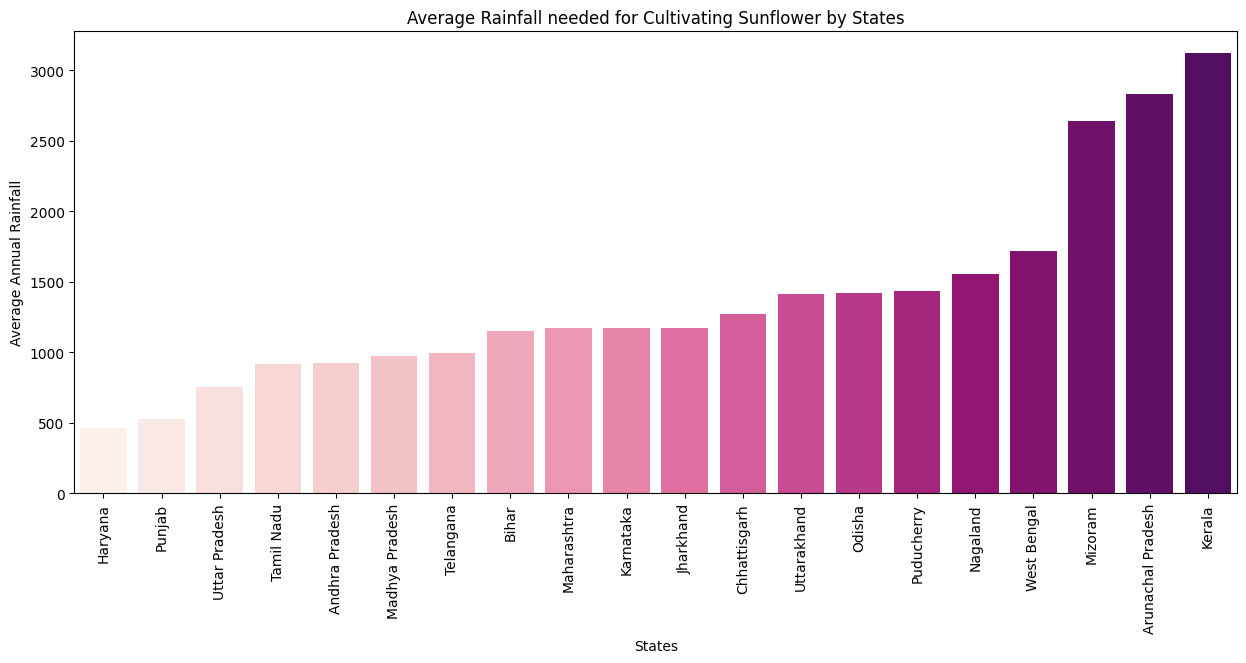

In [241]:
# 10. What is average Rainfall needed for cultivating the crops Sunflower?
s=df.query("Crop=='Sunflower'")
s1=s.groupby('State')['Annual_Rainfall'].mean().reset_index()
sf1=s1.sort_values(by='Annual_Rainfall',ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(data=sf1, x='State', y='Annual_Rainfall', palette='RdPu')
plt.xticks(rotation=90)
plt.title('Average Rainfall needed for Cultivating Sunflower by States')
plt.xlabel('States')
plt.ylabel('Average Annual Rainfall')

Text(0, 0.5, 'Total Yields')

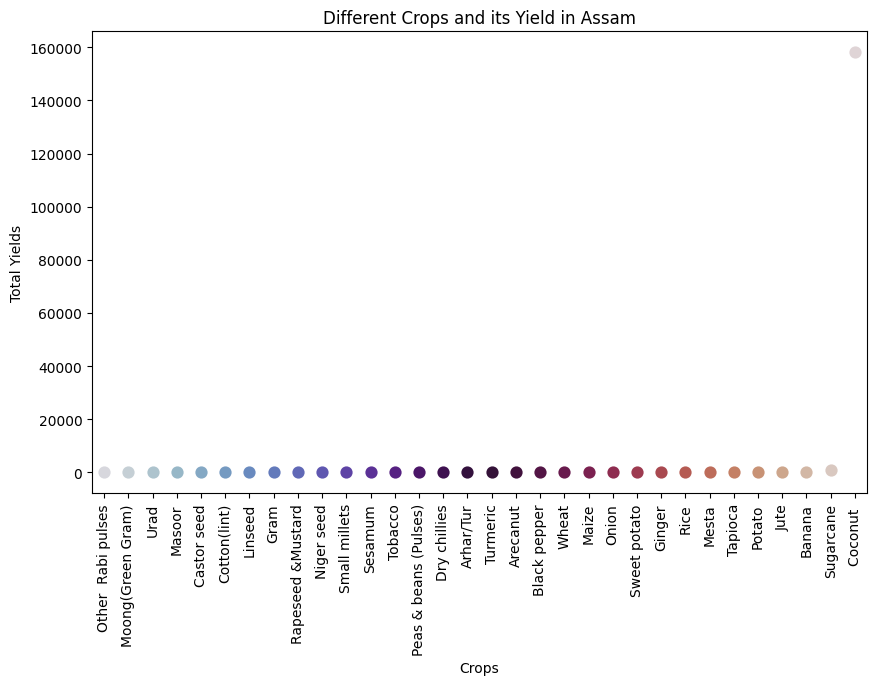

In [260]:
# 11. How many Crops are cultivating on Assam and yield for each crop?
a=df.query("State=='Assam'")
a1=a.groupby('Crop')['Yield'].sum().reset_index()
as1=a1.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(10,6))
sns.pointplot(data=as1, x='Crop', y='Yield', palette='twilight')
plt.xticks(rotation=90)
plt.title('Different Crops and its Yield in Assam')
plt.xlabel('Crops')
plt.ylabel('Total Yields')

Text(0, 0.5, 'Largest Area')

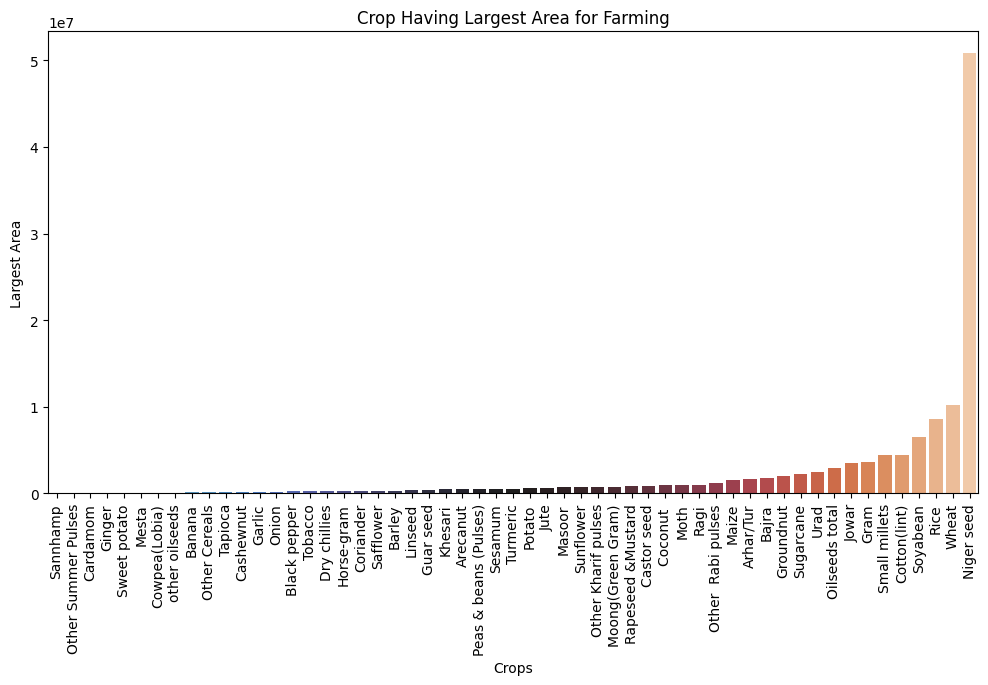

In [264]:
# 12. Which is crop takes the largest area for cultivation?
c=df.groupby('Crop')['Area'].max().reset_index()
c1=c.sort_values(by='Area',ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=c1, x='Crop', y='Area', palette='icefire')
plt.xticks(rotation=90)
plt.title('Crop Having Largest Area for Farming')
plt.xlabel('Crops')
plt.ylabel('Largest Area')

Text(0, 0.5, 'Pesticide Used')

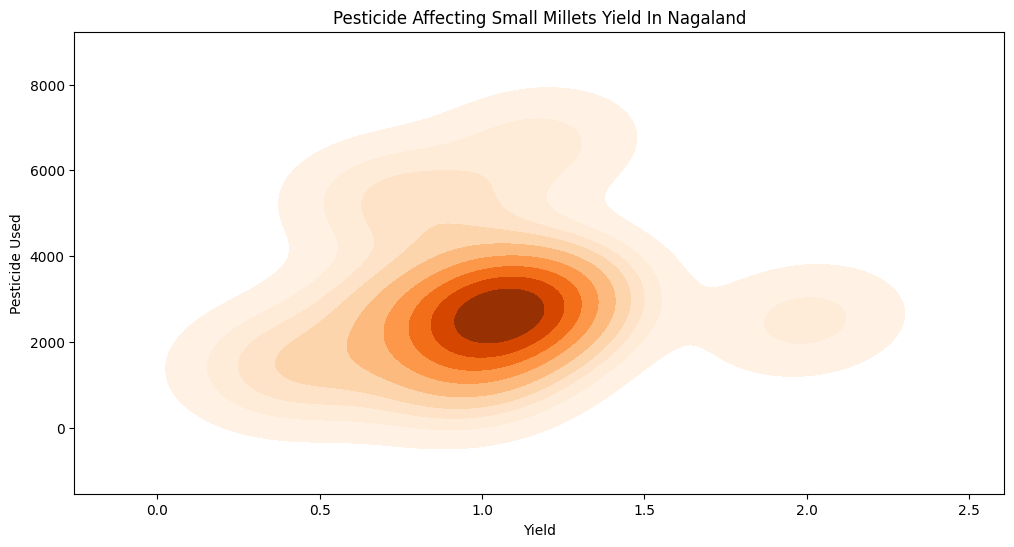

In [268]:
# 13. How pesticide affects on the crop small millets in the state of nagaland in case of yield?
s=df.query("Crop=='Small millets' and State=='Nagaland'")
sm=s.groupby('Yield')['Pesticide'].sum().reset_index()
sm1=sm.sort_values(by='Pesticide',ascending=True)
plt.figure(figsize=(12,6))
sns.kdeplot(data=sm1,x='Yield', y='Pesticide',cmap='Oranges', shade=True)
plt.title('Pesticide Affecting Small Millets Yield In Nagaland')
plt.xlabel('Yield')
plt.ylabel('Pesticide Used')

Text(0, 0.5, 'Yield')

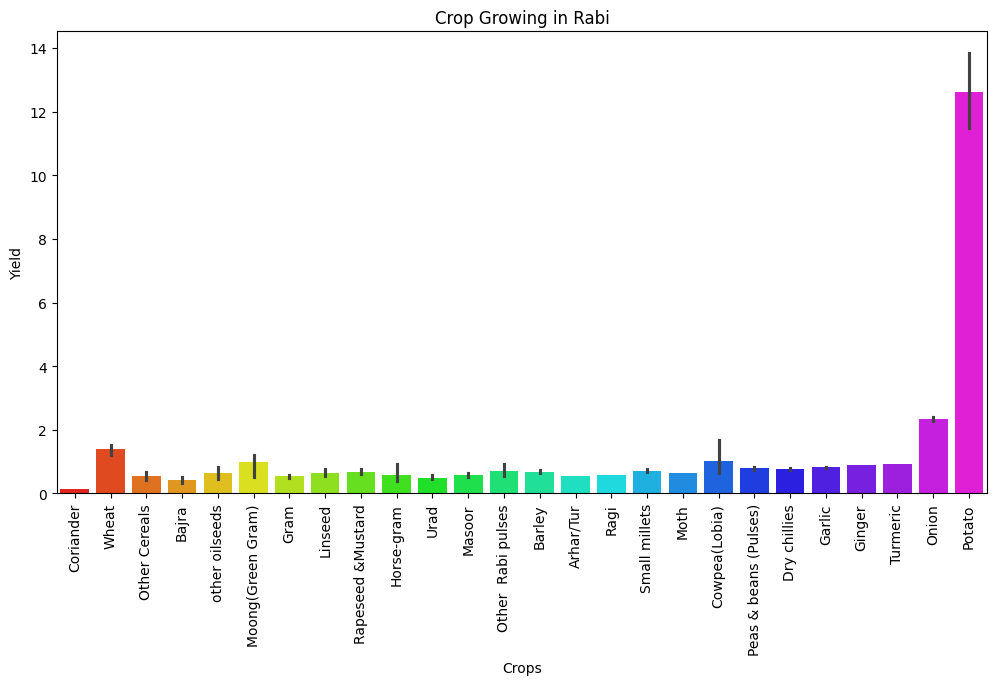

In [280]:
# 14. In Jammu and kashmir which crop are grow that can grow in Rabi?
j=df.query("Season=='Rabi       ' and State=='Jammu and Kashmir'")
j1=j.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=j1, x='Crop', y='Yield', palette='gist_rainbow')
plt.xticks(rotation=90)
plt.title('Crop Growing in Rabi')
plt.xlabel('Crops')
plt.ylabel('Yield')

Text(0, 0.5, 'Average Annual Rainfall')

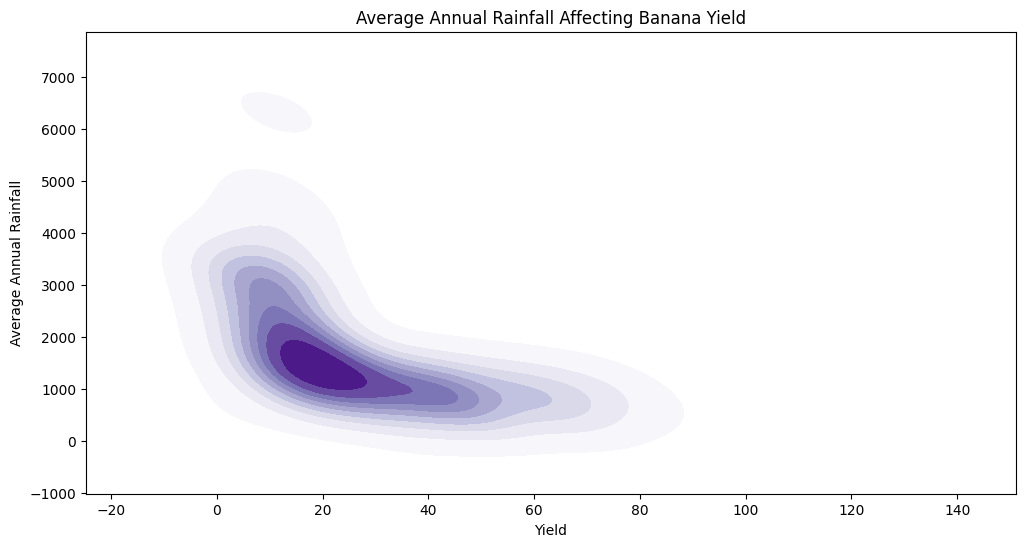

In [282]:
# 15. In Banana how yield can affects to the average annual_rainfall? 
b=df.query("Crop=='Banana'")
bn=b.groupby('Yield')['Annual_Rainfall'].mean().reset_index()
bn1=bn.sort_values(by='Annual_Rainfall',ascending=True)
plt.figure(figsize=(12,6))
sns.kdeplot(data=bn1,x='Yield', y='Annual_Rainfall',cmap='Purples', shade=True)
plt.title('Average Annual Rainfall Affecting Banana Yield')
plt.xlabel('Yield')
plt.ylabel('Average Annual Rainfall')

Text(0, 0.5, 'Maximum Yield')

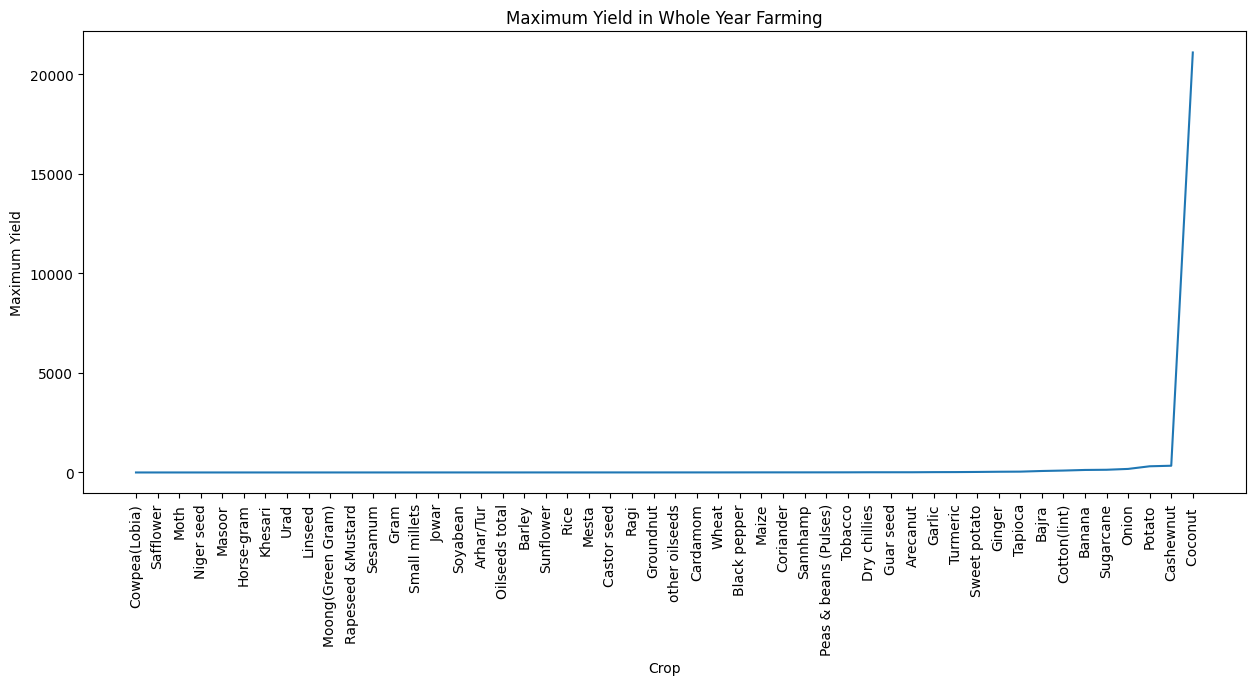

In [288]:
# 16. Which is the season of Whole Year get maximum yield crop? 
s=df.query("Season=='Whole Year '")
sn=s.groupby('Crop')['Yield'].max().reset_index()
sn1=sn.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(15,6))
sns.lineplot(data=sn1, x='Crop', y='Yield')
plt.xticks(rotation=90)
plt.title('Maximum Yield in Whole Year Farming')
plt.xlabel('Crop')
plt.ylabel('Maximum Yield')

Text(0, 0.5, 'Maximum Yield')

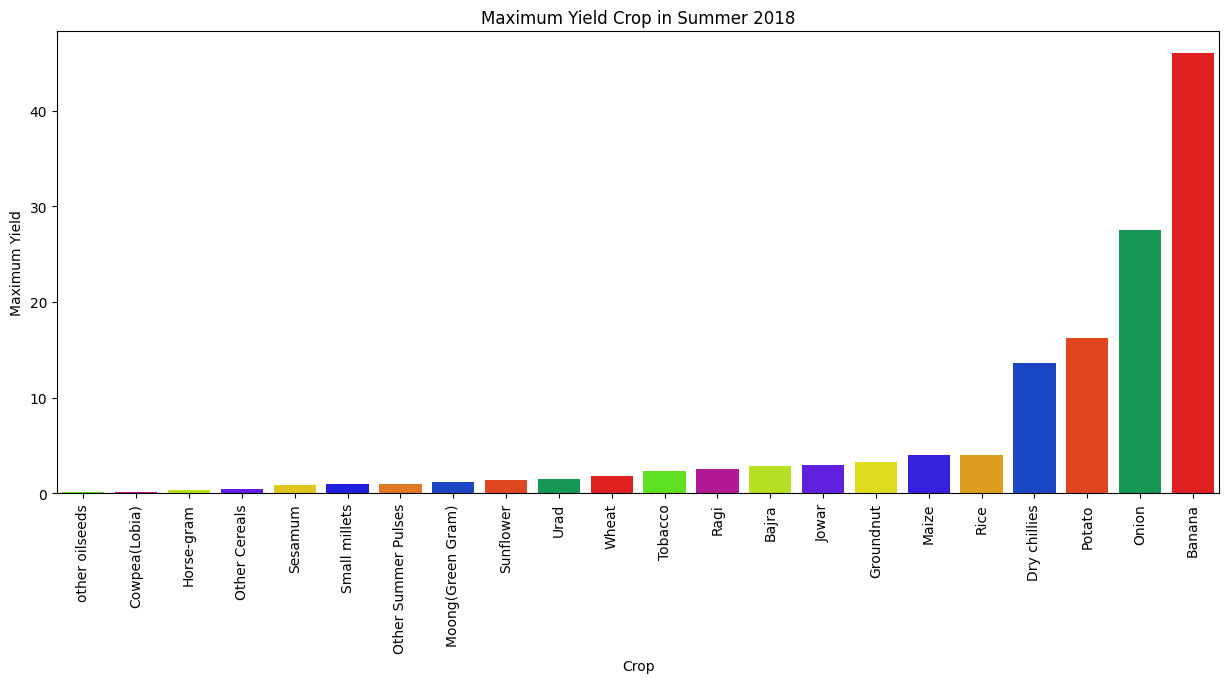

In [304]:
# 17. In the year 2018 which crop get maximum yield during summer?
s=df.query("Crop_Year==2018 and Season=='Summer     '")
sn=s.groupby('Crop')['Yield'].max().reset_index()
sn1=sn.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(data=sn1, x='Crop', y='Yield',palette='prism')
plt.xticks(rotation=90)
plt.title('Maximum Yield Crop in Summer 2018')
plt.xlabel('Crop')
plt.ylabel('Maximum Yield')

Text(0, 0.5, 'Minimum Yield')

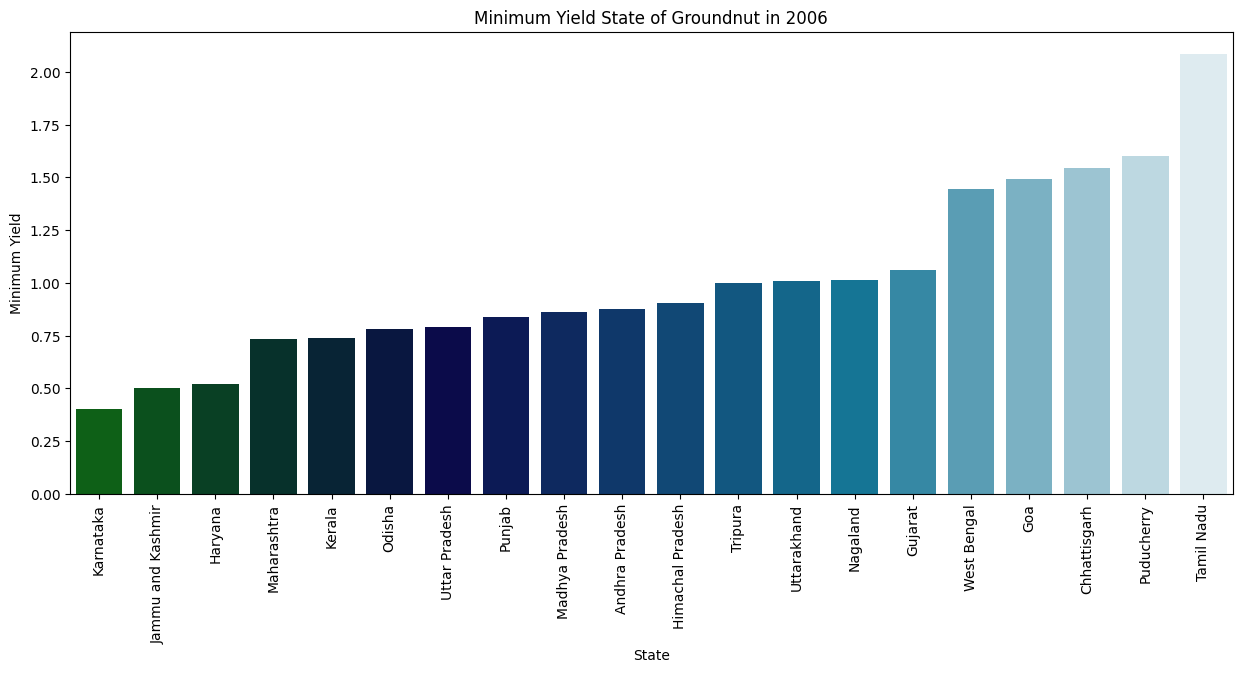

In [306]:
# 18. In the year 2006 and the crop Groundnut get minimum yielding state?
s=df.query("Crop_Year==2006 and Crop=='Groundnut'")
sn=s.groupby('State')['Yield'].min().reset_index()
sn1=sn.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(data=sn1, x='State', y='Yield',palette='ocean')
plt.xticks(rotation=90)
plt.title('Minimum Yield State of Groundnut in 2006')
plt.xlabel('State')
plt.ylabel('Minimum Yield')

Text(0, 0.5, 'Maximum Yield')

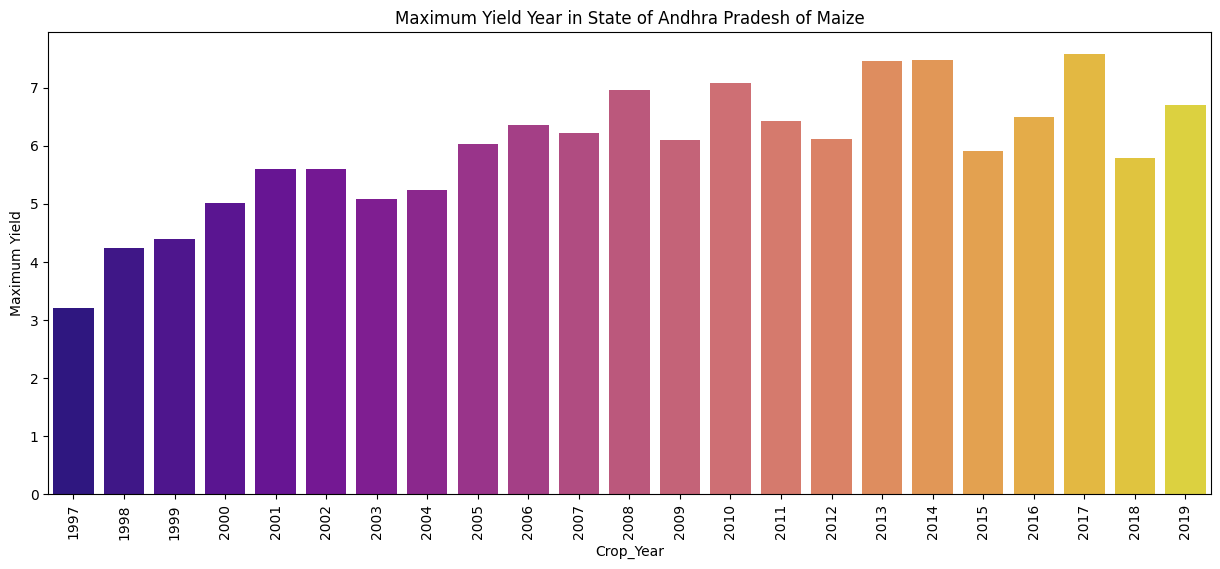

In [308]:
# 19. In which year the crop Maize and in state Andhra Pradesh of get maximum yielding ?
a=df.query("Crop=='Maize' and State=='Andhra Pradesh'")
ap=a.groupby('Crop_Year')['Yield'].max().reset_index()
ap1=ap.sort_values(by='Yield',ascending=True)
plt.figure(figsize=(15,6))
sns.barplot(data=ap1, x='Crop_Year', y='Yield',palette='plasma')
plt.xticks(rotation=90)
plt.title('Maximum Yield Year in State of Andhra Pradesh of Maize')
plt.xlabel('Crop_Year')
plt.ylabel('Maximum Yield')

Text(0, 0.5, 'Minimum Production')

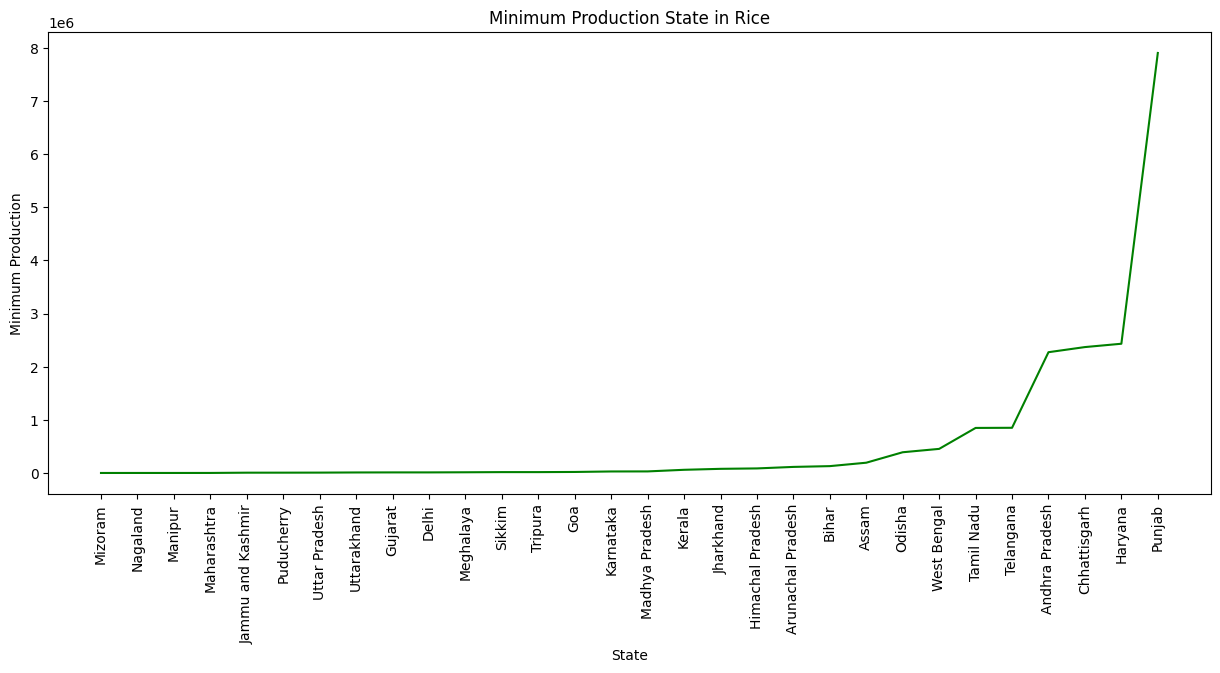

In [312]:
# 20. In which state the crop Rice get minimum Production ?
r=df.query("Crop=='Rice'")
rc=r.groupby('State')['Production'].min().reset_index()
rc1=rc.sort_values(by='Production',ascending=True)
plt.figure(figsize=(15,6))
sns.lineplot(data=rc1, x='State', y='Production',color='g')
plt.xticks(rotation=90)
plt.title('Minimum Production State in Rice')
plt.xlabel('State')
plt.ylabel('Minimum Production')